In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

In [ ]:
%run ../test/test_activate.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 24, 30)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(150)

In [ ]:
op0.show_performance()

In [ ]:
op0.save_model()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.2

In [1]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [ ]:
#real = DataLoader('aapl', '2010-05-01', '2010-05-28')

In [ ]:
#real = real.get_close()

In [ ]:
#len(real)

In [2]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [3]:
predict = predict.get_close()

In [4]:
predict_req, real = data_prep(predict, 24, 30)

In [ ]:
#real

In [ ]:
final_df1 = individual_predictors1(training, predict_req, 30)

In [ ]:
final_df2 = individual_predictors2(training, predict_req, 30)

In [ ]:
final_df3 = individual_predictors3(training, predict_req, 30)

In [ ]:
final_df3

In [ ]:
final_df4 = individual_predictors4(training, predict_req, 30)

In [ ]:
final_df5 = individual_predictors5(training, 20)

In [5]:
final_df6 = individual_predictors_pretrained1(predict_req, 30)

In [6]:
final_df6

,CNN-LSTM,MLP,CNN
0,9.116774,9.221597,8.817613
1,8.952804,9.571225,8.808110
2,8.725756,8.856209,8.584846
3,8.563080,10.683270,8.502132
4,8.261903,9.079777,8.217581
5,7.963663,9.712100,8.196969
6,7.678870,9.424383,8.080855
7,6.938310,8.293983,7.917155
8,6.712652,9.337017,7.797997
9,6.351397,9.581328,7.738123


### System Disagreement

In [ ]:
system_disagreement(final_df1)

In [ ]:
system_disagreement(final_df2)

In [ ]:
system_disagreement(final_df3)

In [ ]:
system_disagreement(final_df4)

In [ ]:
system_disagreement(final_df5)

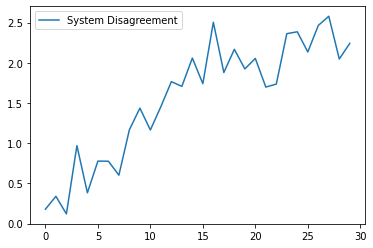

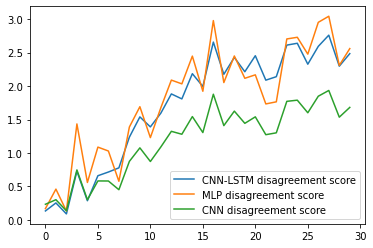

In [7]:
system_disagreement(final_df6)

### System consensus

In [ ]:
algos1 = consensus(final_df1, real)

In [ ]:
algos2 = consensus(final_df2, real)

In [ ]:
algos3 = consensus(final_df3, real)

In [ ]:
algos4 = consensus(final_df4, real)

In [ ]:
algos5 = consensus(final_df5, real)

In [8]:
algos6 = consensus(final_df6, real)

In [ ]:
ui1 = combined_frame(final_df1, algos1, real)

In [ ]:
ui2 = combined_frame(final_df2, algos2, real)

In [ ]:
ui3 = combined_frame(final_df3, algos3, real)

In [ ]:
ui4 = combined_frame(final_df4, algos4, real)

In [ ]:
#ui5 = combined_frame(final_df5, algos5, real)

In [9]:
ui6 = combined_frame(final_df6, algos6, real)

In [11]:
yu = all_stats_frame(ui6, final_df6)

In [12]:
yu

,Average,NoMemory,Memory,Focus,Anchor,Real Value,CNN-LSTM,MLP,CNN,System Disagreement,CNN-LSTM disagreement score,MLP disagreement score,CNN disagreement score
Date,,,,,,,,,,,,,
2010-07-06,9.051994,9.051994,9.051994,9.051994,9.079437,8.879643,9.116774,9.221597,8.817613,0.179548,0.134661,0.169602,0.234382
2010-07-07,9.110713,9.031743,9.071228,8.808110,9.120357,9.238214,8.952804,9.571225,8.808110,0.339162,0.254372,0.460512,0.302603
2010-07-08,8.722270,8.728712,8.714512,8.725756,8.711613,9.217500,8.725756,8.856209,8.584846,0.120606,0.090454,0.133939,0.137424
2010-07-09,9.249494,9.347883,9.224029,10.683270,9.630644,9.272143,8.563080,10.683270,8.502132,0.969394,0.727046,1.433776,0.747362
2010-07-12,8.519753,8.454921,8.498789,8.261903,8.476064,9.188929,8.261903,9.079777,8.217581,0.383198,0.287399,0.560023,0.302173
2010-07-13,8.624244,8.850559,8.628281,9.712100,8.909614,8.992857,7.963663,9.712100,8.196969,0.777083,0.660581,1.087856,0.582812
2010-07-14,8.394703,8.443032,8.404864,9.424383,8.521139,9.026071,7.678870,9.424383,8.080855,0.775784,0.715833,1.029680,0.581838
2010-07-15,7.716483,7.833301,7.738162,8.293983,7.807160,8.980357,6.938310,8.293983,7.917155,0.602522,0.778173,0.577501,0.451891
2010-07-16,7.949222,8.177801,8.012546,9.337017,8.434305,8.925000,6.712652,9.337017,7.797997,1.166385,1.236570,1.387795,0.874788


,Algorithms,MSE
0,Average,3.929127
1,NoMemory,2.222062
2,Memory,2.829538
3,Focus,0.457158
4,Anchor,2.033625
5,CNN-LSTM,14.893194
6,MLP,0.425638
7,CNN,4.074368


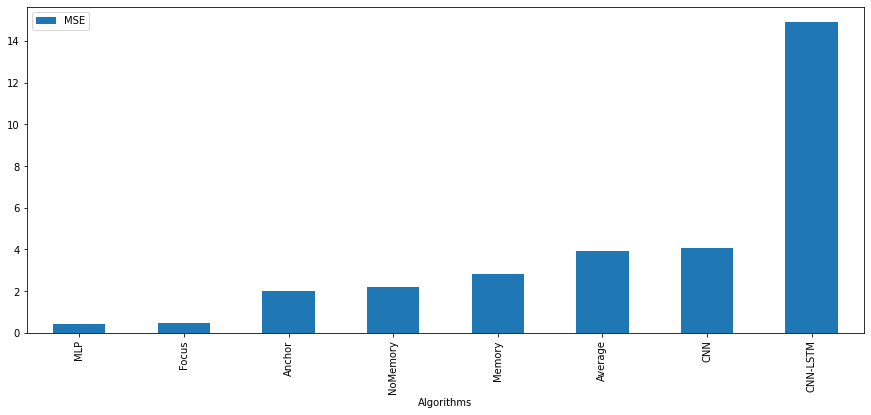

In [13]:
mse_score(ui6)

,Algorithms,MSE Log
0,Average,0.049239
1,NoMemory,0.026024
2,Memory,0.033840
3,Focus,0.004464
4,Anchor,0.023566
5,CNN-LSTM,0.257301
6,MLP,0.004128
7,CNN,0.050827


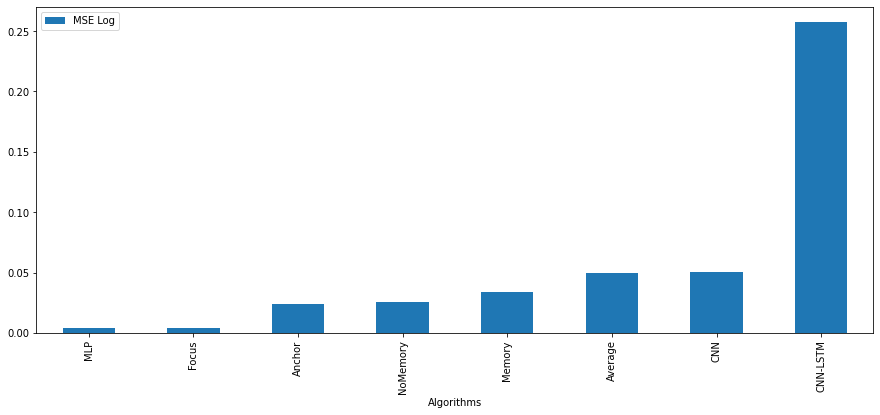

In [14]:
mse_log_score(ui6)

,Algorithms,MAE
0,Average,1.742686
1,NoMemory,1.303642
2,Memory,1.491277
3,Focus,0.548286
4,Anchor,1.249955
5,CNN-LSTM,3.436043
6,MLP,0.519092
7,CNN,1.840424


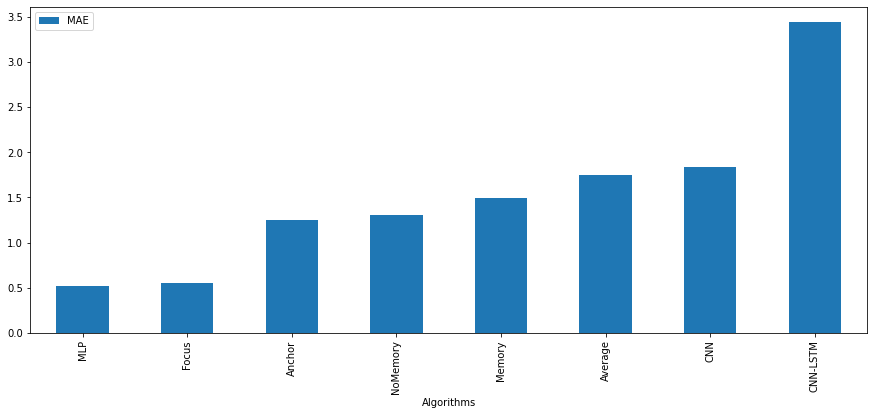

In [15]:
mae_score(ui6)

In [ ]:
mse_score(ui2)

In [ ]:
mse_log_score(ui1)

In [ ]:
mae_score(ui2)

In [ ]:
mse_score(ui3)

In [ ]:
mse_log_score(ui3)

In [ ]:
mae_score(ui3)

In [ ]:
plot_performance(ui1)

In [ ]:
plot_performance(ui2)

In [ ]:
plot_performance(ui3)

In [ ]:
plot_performance(ui4)

In [ ]:
plot_performance(ui5)

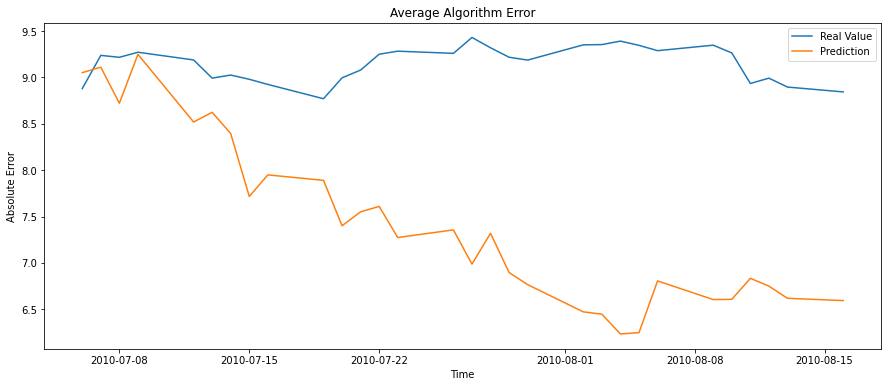

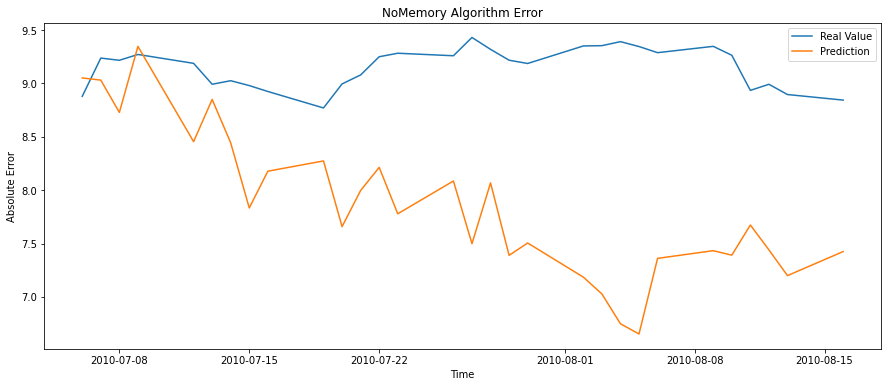

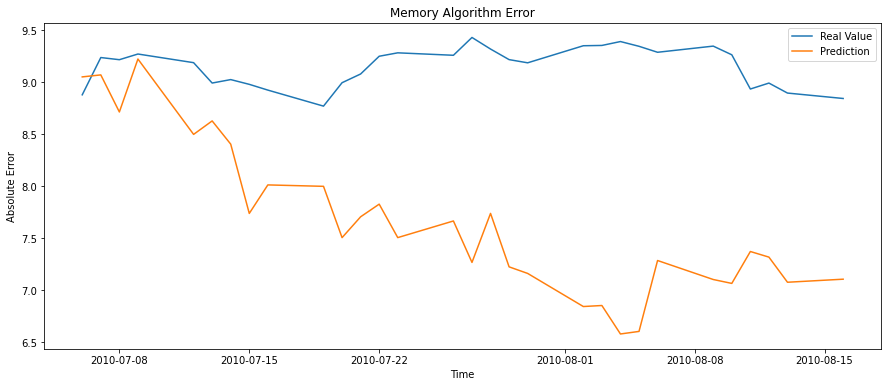

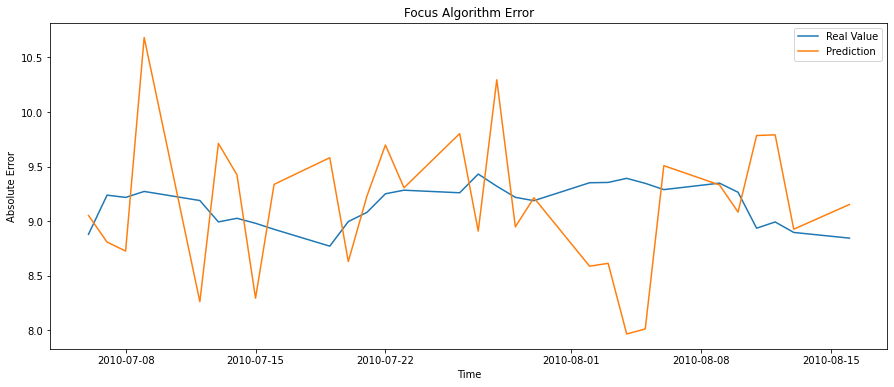

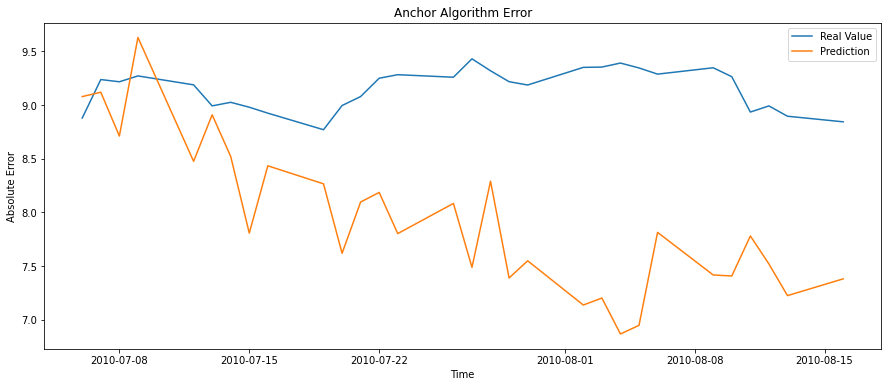

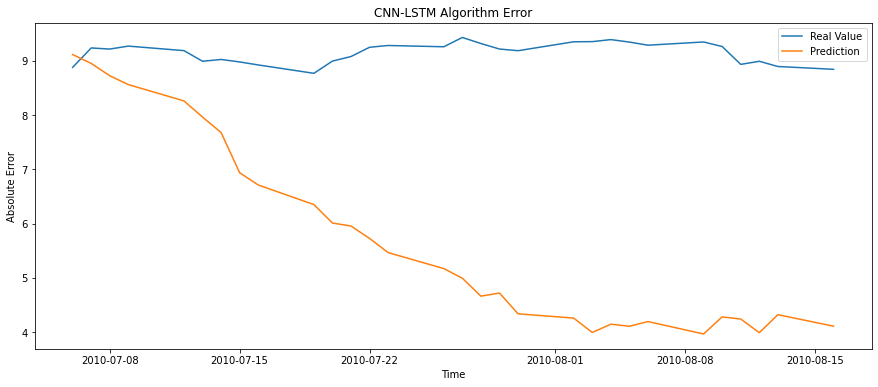

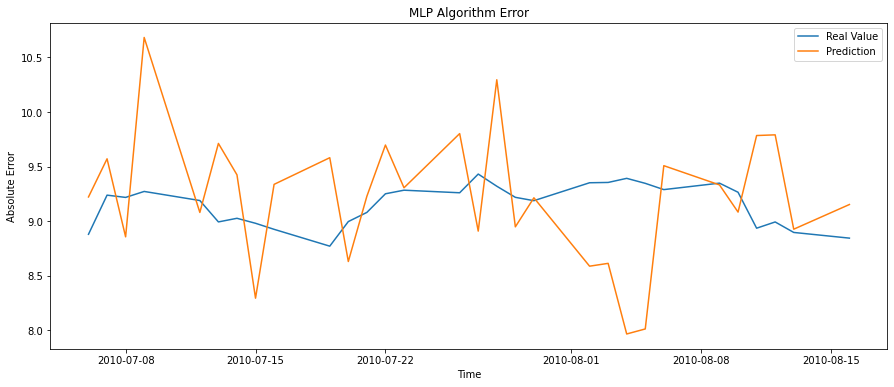

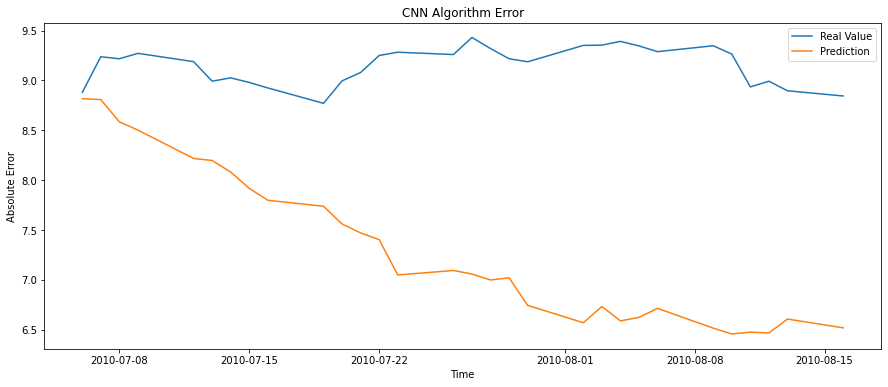

In [16]:
plot_performance(ui6)

In [ ]:
training = DataLoader('aapl', '2005-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [ ]:
motest = HybridUnivariatePredictor(2, 24, 30, training)

In [ ]:
motest.create_cnnlstm()

In [ ]:
motest.fit_model(10)

In [ ]:
motest.show_performance()

In [ ]:
motest = BasicUnivariatePredictor(24, 30, training)

In [ ]:
motest.create_cnn()

In [ ]:
motest.fit_model(300)

In [ ]:
motest.show_performance()

In [ ]:
motest.save_model()